# Сборный Проект — 1

**Заголовок:** Анализ данных о продажах игр

**Цель исследования:** Проанализировать исторические данные о продажах игр и выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Ход исследования:**
1. Анализ информации о данных: загрузка и изучение общей информации из датасета
2. Предобработка данных: обработка дубликатов и изменение типов данных
3. Исследовательский анализ данных: описание и визуализация общей информации об играх и платформах
4. Составление портрета пользователя каждого региона: определение популярных платформ и жанров для NA, EU, JP
5. Проверка гипотез о равенстве зрительских рейтингов для разных платформ и жанров

**Общий вывод:** резюмирование полученных результатов, формулировка ключевых выводов и рекомендаций

In [1]:
#загружаю библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

#### Шаг 1. Загрузка данных

In [2]:
#открываю данные
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.info() #изучаю общую информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.head() #вывожу первые строки

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


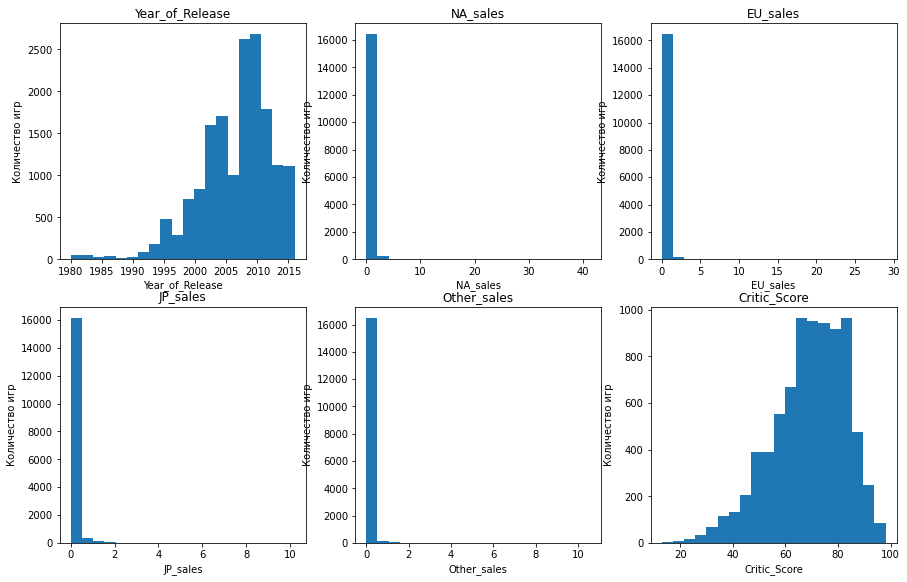

In [6]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))  
axes = axes.flatten() 

# Проходимся по всем числовым столбцам
for i, column in enumerate(data.select_dtypes(include=[np.number]).columns):
    axes[i].hist(data[column], bins=20) 
    axes[i].set_title(column) 
    axes[i].set_xlabel(column)  
    axes[i].set_ylabel('Количество игр')  

# Убираю пустые графики, если числовых столбцов меньше 12
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # удаляю лишние оси
    
plt.show()

In [8]:
print('Количество явных дубликатов = ', data.duplicated().sum())

Количество явных дубликатов =  0


In [9]:
#проверяю наличие неявных дубликатов
print(data[data.duplicated(['Name', 'Platform', 'Year_of_Release'])].count())

Name               1
Platform           2
Year_of_Release    2
Genre              1
NA_sales           2
EU_sales           2
JP_sales           2
Other_sales        2
Critic_Score       1
User_Score         1
Rating             1
dtype: int64


**Вывод:**

В данных 16715 строк. Есть пропущенные значения и некорректный тип данных. Явные дубликаты отсутствуют, есть неявные дубликаты

#### Шаг 2. Предобработка данных

**Переименование столбцов**

In [10]:
#привожу названия столбцов к стандартоному виду
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Удаление дубликатов**

In [11]:
data = data.drop_duplicates(['name', 'platform', 'year_of_release'])
print(data[data.duplicated(['name', 'platform', 'year_of_release'])].count())

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


**Удаление пропусков**

In [12]:
data.isna().sum()#смотрю, в каких стобцах есть пропуски

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

Удаляем строки с пропусками в стобцах name и year_of_release, так как пропуски в этих толбцах будут мешать последующему анализу данных, а их количество не является критическим

In [13]:
data = data.dropna(subset = ['name'])
data = data.dropna(subset=['year_of_release'])
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

В столбце user_score встречается аббревеатура 'tbd', что означает "to be determined". Посмотрим как много таких значений

In [14]:
(data['user_score'] == 'tbd').sum()

2376

Преобразую эти значения в NaN

In [15]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Для столбцов critic_score и user_score будет некорректно заменять пропуски на медианные значения, поэтому заменим их на -1

In [16]:
data['critic_score'] = data['critic_score'].fillna('-1')
data['user_score'] = data['user_score'].fillna('-1')
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6676
dtype: int64

Посмотрим какие значения есть в столбце rating

In [17]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Заменим пропуски на no_ESRB

In [19]:
data['rating'] = data['rating'].fillna('no_ESRB')
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Пропуски в исходных данных могут возникнуть по следующим причинам:

1. Неполное заполнение анкет или форм – респонденты могли пропустить некоторые вопросы.
2. Технические сбои при проведении опросов или сборе данных (например, сбои в программном обеспечении или оборудовании).
3. Данные могли быть неправильно введены вручную, что привело к пропускам.
4. Ошибки форматирования, когда система не распознала данные и пропустила их.
5. Данные могут быть загружены из разных источников, и если некоторые источники имеют неполные записи, это может привести к пропускам.
6. Проблемы с совместимостью форматов данных могут вызвать потери или пропуски.

**Изменение типов данных**

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  object 
 9   user_score       16443 non-null  object 
 10  rating           16443 non-null  object 
dtypes: float64(5), object(6)
memory usage: 1.5+ MB


Заменим переведем числовые данные в стобцах year_of_release и critic_score в int, user_score в float

In [21]:
data['year_of_release'] = data['year_of_release'].astype(int)
data['critic_score'] = data['critic_score'].astype(int)
data['user_score'] = data['user_score'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  int64  
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


**Суммарные продажи во всех регионах**

In [22]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,no_ESRB,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,no_ESRB,31.38


**Выводы:**

В ходе предобработки данных в датафрейме сделаны следующие преобразования:
1. Названия столбцов приведены к нижнему регистру
2. Удалены неявные дубликаты
3. В столбцах user_score и critic_score пропуски заменены на - 1, столбце rating пропуски заменены на no_ESRB
4. Типы данных в столбцах year_of_release и critic_score заменены на целые значения
5. Добавлен столбец total_sales, отражающий суммарные продажи во всех регионах

In [23]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  int64  
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

#### Шаг 3. Исследовательский анализ данных

**Динамика выпуска игр по годам**

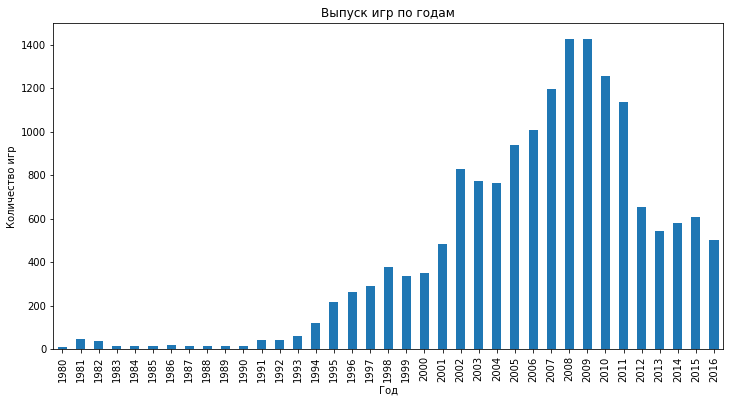

In [24]:
# строю столбчатую диаграмму
plt.figure(figsize=(12, 6))
data['year_of_release'].value_counts().sort_index().plot(kind='bar')
plt.title('Выпуск игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

Количество выпускаемых игр росло с 1991 по 2008-2009 годы, потом оно начало уменьшаться.
Данные за все периоды важны для комплексного понимания рынка видеоигр

**Продажи по платформам**

In [25]:
platform_table = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
platform_table

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


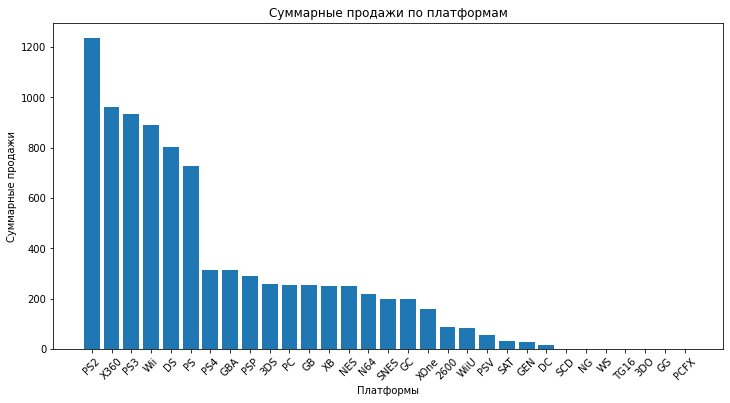

In [26]:
# строю столбчатую диаграмму
plt.figure(figsize=(12, 6)) 
plt.bar(platform_table.index, platform_table['total_sales'])  
plt.title('Суммарные продажи по платформам')  
plt.xlabel('Платформы') 
plt.ylabel('Суммарные продажи')
plt.xticks(rotation=45) 
plt.show()

Виден значительный отрыв по продажам между первыми шестью и остальными платформами. Посчитаю какой процент от всех продаж приходится на них

In [27]:
print((platform_table.head(6)['total_sales'].sum() / platform_table['total_sales'].sum()) * 100)

62.938999541656905


Таким образом на первые 6 платформ приходится более половины всех продаж (62,9%). В анализе по годам будем использовать их.

In [28]:
#создаю функцию для анализа продаж по годам для платформ
def plot_games_released(data, platform):
    # фильтруем данные для указанной платформы
    platform_data = data[data['platform'] == platform]
    # Строим график
    plt.figure(figsize=(12, 6))
    platform_data['year_of_release'].value_counts().sort_index().plot(kind='bar')
    plt.title(f'Выпуск игр на платформе {platform} по годам')
    plt.xlabel('Год')
    plt.ylabel('Количество игр')
    plt.show()

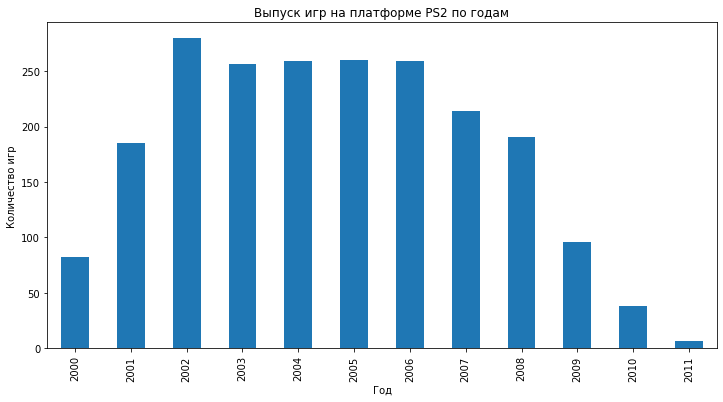

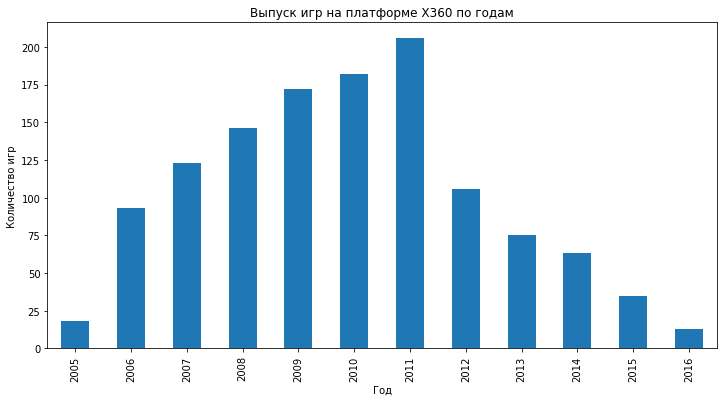

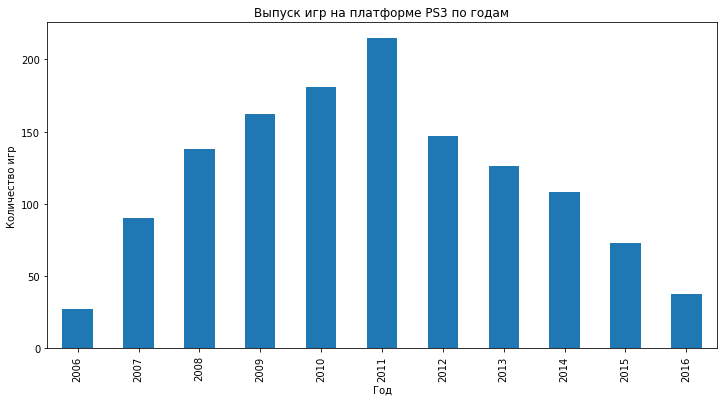

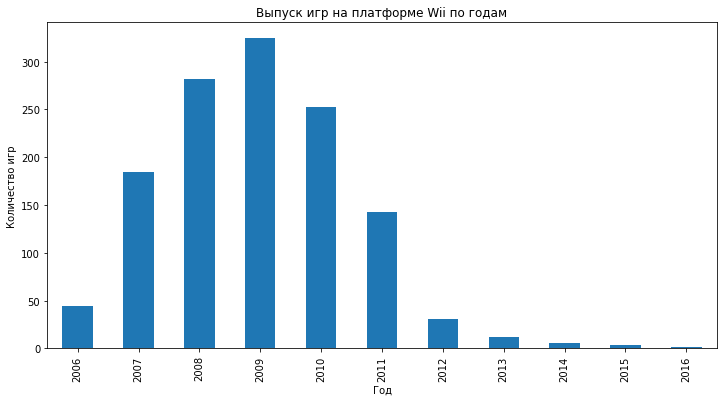

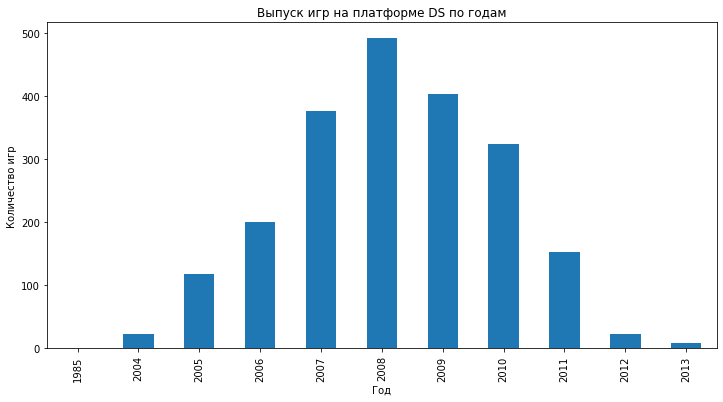

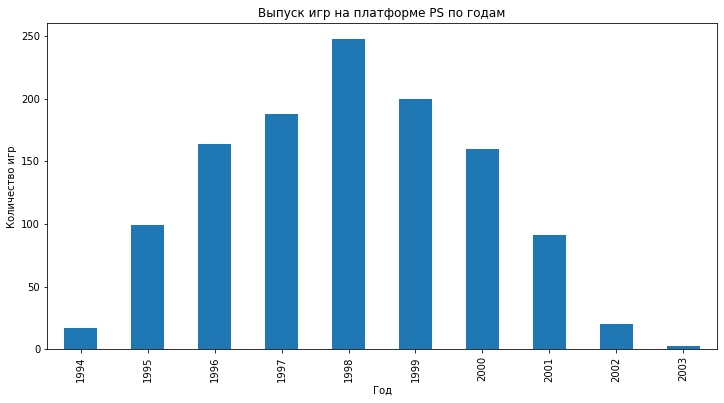

In [29]:
# cписок платформ, для которых мы хотим построить графики
platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'] 
#строю графики для 6-ти самых популярных платформ
for platform in platforms:
    plot_games_released(data, platform)

"Срок жизни" платформы в среднем составляет 10 лет. Но пика по продажам в основном достигают через пять лет после начала продаж.
Значит актуальный период для 2017 года начинается с 2012 года.

**Формирование актуального датасета**

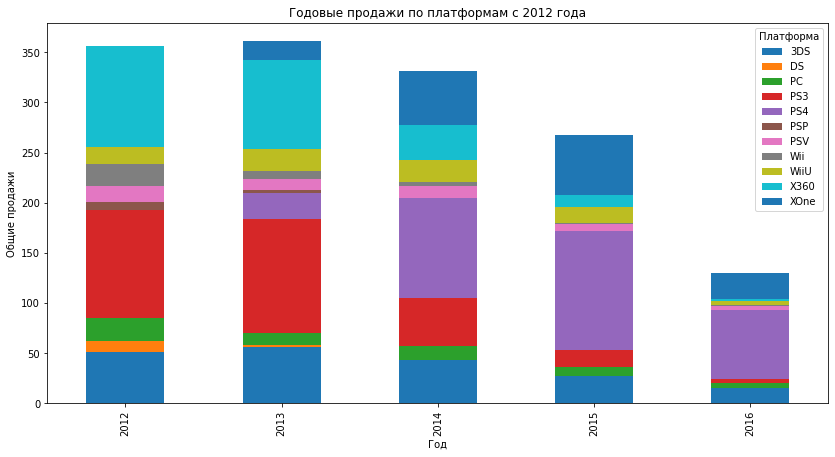

In [31]:
# фильтрую данные с 2012 года
data_filtered = data[data['year_of_release'] >= 2012]

total_sales = data_filtered.groupby('platform')['total_sales'].sum().reset_index() # Общая сумма продаж по платформам

# cортирую платформы по общим продажам
total_sales = total_sales.sort_values(by='total_sales', ascending=False)

# годовой анализ продаж
yearly_sales = data_filtered.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()


# визуализация
yearly_sales.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Годовые продажи по платформам с 2012 года')
plt.xlabel('Год')
plt.ylabel('Общие продажи')
plt.legend(title='Платформа')
plt.show()

Среди всех платформ за последние 5 лет положительную динамику демонстрируют PS4 и XOne. Можно назвать их потенциально прибыльными.

**График «ящик с усами» по глобальным продажам игр в разбивке по платформам**

<Figure size 720x720 with 0 Axes>

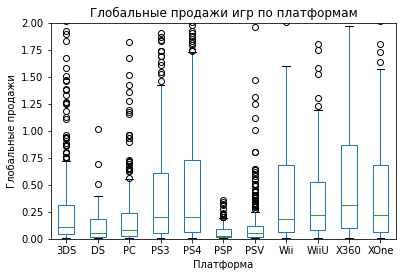

In [32]:
plt.figure(figsize=(10, 10))
data_filtered.boxplot(column='total_sales', by='platform', grid=False)
plt.ylim(0,2)
plt.title('Глобальные продажи игр по платформам')
plt.suptitle('')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')
plt.show()

<Figure size 720x720 with 0 Axes>

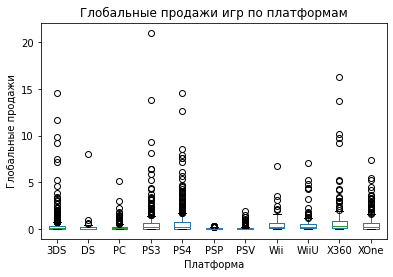

In [33]:
plt.figure(figsize=(10, 10))
data_filtered.boxplot(column='total_sales', by='platform', grid=False)
plt.title('Глобальные продажи игр по платформам')
plt.suptitle('')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')
plt.show()

Все платформы имеют выбросы, платформа X360 имеет максимальное значение 3-его квартиля и медианный показатель. Платформы PS4 и XOne имеют близкие значение.

**Влияние отзывов на продажи**

Посмотрим, как отзывы пользователей и критиков влияют на продажи внутри двух интересующих нас платформ (PS4 и XOne)

In [35]:
# создаю функцию для построения графиков рассеяния
def plot_correlation(data, platform):
    # фильтруем данные для указанной платформы
    data_platform_critic = data[(data['platform'] == platform) & 
                         (data['critic_score'] > -1)]
    
    # строим диаграмму рассеяния для оценки критиков и глобальных продаж
    plt.figure(figsize=(8, 6))
    plt.scatter(data_platform_critic['critic_score'], data_platform_critic['total_sales'])
    plt.title(f'Оценка критиков vs Глобальные продажи ({platform})')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Глобальные продажи')
    plt.grid()
    plt.show()
    
    # вычисляем коэффициент корреляции для критиков
    correlation_critic = data_platform_critic['critic_score'].corr(data_platform_critic['total_sales'])
    print(f'Коэффициент корреляции (Оценка критиков, Глобальные продажи): {correlation_critic}')
    
    # фильтруем данные для указанной платформы
    data_platform_user = data[(data['platform'] == platform) & 
                         (data['user_score'] > -1)]
    
    # строим диаграмму рассеяния для оценки зрителей и глобальных продаж
    plt.figure(figsize=(8, 6))
    plt.scatter(data_platform_user['user_score'], data_platform_user['total_sales'], color='orange')
    plt.title(f'Оценка зрителей vs Глобальные продажи ({platform})')
    plt.xlabel('Оценка зрителей')
    plt.ylabel('Глобальные продажи')
    plt.grid()
    plt.show()

    # вычисляем коэффициент корреляции для зрителей
    correlation_user = data_platform_user['user_score'].corr(data_platform_user['total_sales'])
    print(f'Коэффициент корреляции (Оценка зрителей, Глобальные продажи): {correlation_user}')

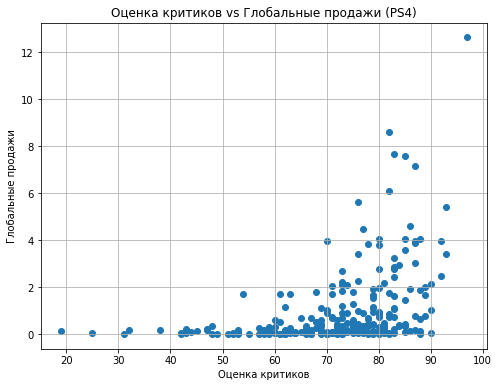

Коэффициент корреляции (Оценка критиков, Глобальные продажи): 0.40656790206178095


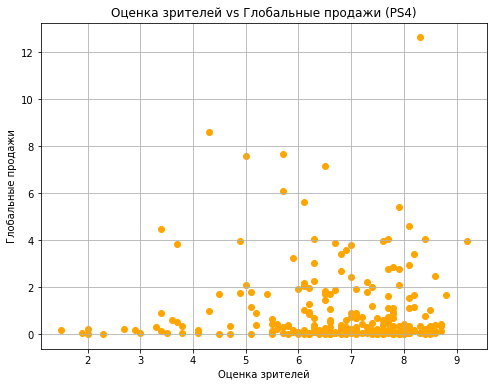

Коэффициент корреляции (Оценка зрителей, Глобальные продажи): -0.031957110204556376


In [36]:
plot_correlation(data_filtered, 'PS4')

Отрицательная корреляция между пользовательсикими оценками и продажами(-0.032) говорит о том, что между переменными нет значительной связи.
Положительная корреляция (0.407) предполагает, что существует некоторый положительный тренд между оценками критиков и продажами игр - чем выше оценка критиков, тем больше происходит продаж.

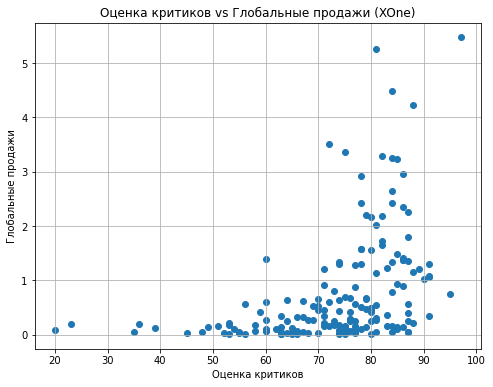

Коэффициент корреляции (Оценка критиков, Глобальные продажи): 0.4169983280084017


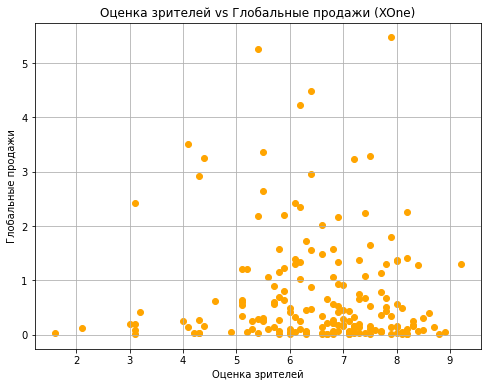

Коэффициент корреляции (Оценка зрителей, Глобальные продажи): -0.06892505328279414


In [37]:
plot_correlation(data_filtered, 'XOne')

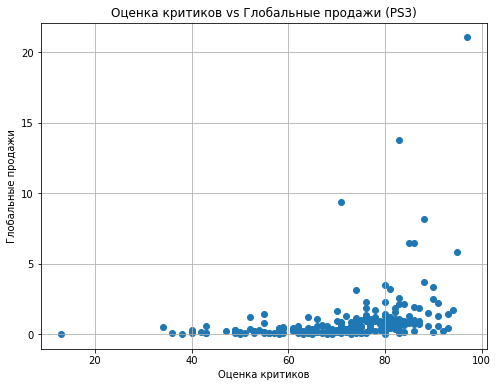

Коэффициент корреляции (Оценка критиков, Глобальные продажи): 0.3341517575509856


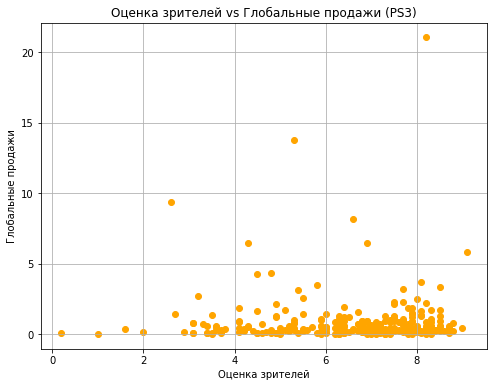

Коэффициент корреляции (Оценка зрителей, Глобальные продажи): -0.006205767686051523


In [38]:
plot_correlation(data_filtered, 'PS3')

Коэффициенты корелляции для XOne и PS3 показывают ту же тенденцию, что и для PS4.
Таким образом, можно утверждать, что оценки зрителей не влияют на проажи, а оценки критиков влияют на продажи положительно

**Распределение игр по жанрам**

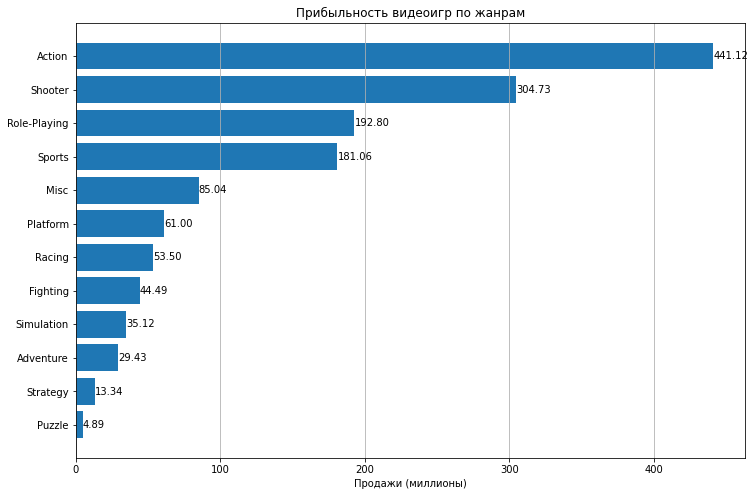

In [39]:
# cортировка по продажам
genre_sales_sorted = data_filtered.groupby('genre')['total_sales'].sum().reset_index().sort_values(by='total_sales')

# построение графика
plt.figure(figsize=(12, 8))
plt.barh(genre_sales_sorted['genre'], genre_sales_sorted['total_sales'])
plt.xlabel('Продажи (миллионы)')
plt.title('Прибыльность видеоигр по жанрам')
plt.grid(axis='x')

# Показать значения на графике
for index, value in enumerate(genre_sales_sorted['total_sales']):
    plt.text(value, index, f"{value:.2f}", va='center')

plt.show()

Самыми прибыльными жанрами являются шутеры и экшены. 

<Figure size 720x720 with 0 Axes>

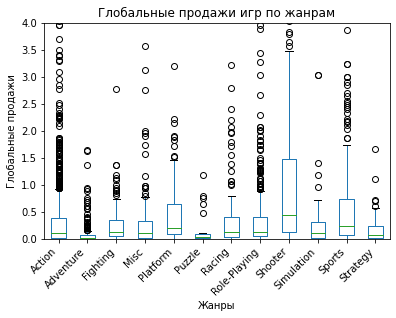

In [40]:
plt.figure(figsize=(10, 10))
data_filtered.boxplot(column='total_sales', by='genre', grid=False)
plt.ylim(0,4)
plt.title('Глобальные продажи игр по жанрам')
plt.suptitle('')
plt.xlabel('Жанры')
plt.ylabel('Глобальные продажи')
plt.xticks(rotation=45, ha='right')
plt.show()

На представленном графике можно наблюдать, что шутеры являются наиболее коммерчески успешными, так как их медиана продаж превышает показатели других жанров. Это позволяет считать шутеры привлекательным сегментом для реализации игр. Остальные жанры демонстрируют усреднённые результаты и схожие медианные значения. Тем не менее, стоит обратить внимание на платформеры и спортивные игры, которые также показывают неплохие результаты по продажам.

**Выводы:**
1. Количество выпускаемых игр росло с 1991 по 2008-2009 годы, потом оно начало уменьшаться.
2. Более половины всех продаж (62,9%) приходится на 6 платформ: PS2, X360, PS3, Wii, DS, PS.
3. "Срок жизни" платформы в среднем составляет 7 лет. Но пика по продажам в основном достигают через пять лет после начала продаж.
4. Среди всех платформ за последние 5 лет положительную динамику демонстрируют PS4 и XOne. Можно назвать их потенциально прибыльными.
5. Оценки зрителей не влияют на продажи, а оценки критиков влияют на продажи положительно.
6. Самыми прибыльными жанрами являются шутеры и экшены. Стоит обратить внимание на платформеры и спортивные игры, которые также показывают неплохие результаты по продажам

#### Шаг 4. Портрет пользователя каждого региона

Создаем несколько функций, которые упростят работу по этому разделу

In [41]:
def group_sales(data, group_by, sales_cols):
    """
    Группирует данные по указанному критерию и суммирует продажи.

    data: DataFrame с данными о продажах.
    group_by: Строка, по которой нужно группировать (например, 'platform' или 'genre').
    sales_cols: Лист с названиями столбцов для суммирования продаж.
    return: DataFrame с суммарными продажами по группам.
    """
    return data.groupby(group_by).agg(sales_cols).reset_index()

In [42]:
# функция для построения круговой диаграммы
def plot_pie_chart(sales_data, title):
    plt.figure(figsize=(8, 8))
    plt.pie(sales_data, labels=sales_data.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal') 
    plt.title(title)
    plt.show()

In [43]:
sales_cols = {'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}

**Самые популярные платформы для каждого региона**

In [44]:
platform_sales = group_sales(data_filtered, 'platform', sales_cols)

platform_sales

,platform,na_sales,eu_sales,jp_sales
0,3DS,55.31,42.64,87.79
1,DS,4.59,3.53,3.72
2,PC,19.12,37.76,0.00
3,PS3,103.38,106.85,35.29
4,PS4,108.74,141.09,15.96
5,PSP,0.13,0.42,10.47
6,PSV,10.98,11.36,21.04
7,Wii,17.45,11.92,3.39
8,WiiU,38.10,25.13,13.01
9,X360,140.05,74.52,1.57


In [45]:
# 5 платформ с наибольшими продажами в каждом регионе
na_platform_sales = platform_sales.nlargest(5, 'na_sales')[['platform', 'na_sales']]
eu_platform_sales = platform_sales.nlargest(5, 'eu_sales')[['platform', 'eu_sales']]
jp_platform_sales = platform_sales.nlargest(5, 'jp_sales')[['platform', 'jp_sales']]

display('Топ 5 платформ в Северной Америке:', na_platform_sales.reset_index())
display ('Топ 5 платформ в Европе:', eu_platform_sales.reset_index())
display ('Топ 5 платформ в Японии:', jp_platform_sales.reset_index())

'Топ 5 платформ в Северной Америке:'

,index,platform,na_sales
0,9,X360,140.05
1,4,PS4,108.74
2,3,PS3,103.38
3,10,XOne,93.12
4,0,3DS,55.31


'Топ 5 платформ в Европе:'

,index,platform,eu_sales
0,4,PS4,141.09
1,3,PS3,106.85
2,9,X360,74.52
3,10,XOne,51.59
4,0,3DS,42.64


'Топ 5 платформ в Японии:'

,index,platform,jp_sales
0,0,3DS,87.79
1,3,PS3,35.29
2,6,PSV,21.04
3,4,PS4,15.96
4,8,WiiU,13.01


In [46]:
# объединяю оставшиеся платформы в категорию "другие платформы"
other_na = platform_sales[~platform_sales['platform'].isin(na_platform_sales['platform'])]['na_sales'].sum()
other_eu = platform_sales[~platform_sales['platform'].isin(eu_platform_sales['platform'])]['eu_sales'].sum()
other_jp = platform_sales[~platform_sales['platform'].isin(jp_platform_sales['platform'])]['jp_sales'].sum()

# cоздаю новые DataFrame для круговых диаграмм
na_sales = pd.concat([na_platform_sales.set_index('platform')['na_sales'], pd.Series({'Другие платформы': other_na})])
eu_sales = pd.concat([eu_platform_sales.set_index('platform')['eu_sales'], pd.Series({'Другие платформы': other_eu})])
jp_sales = pd.concat([jp_platform_sales.set_index('platform')['jp_sales'], pd.Series({'Другие платформы': other_jp})])


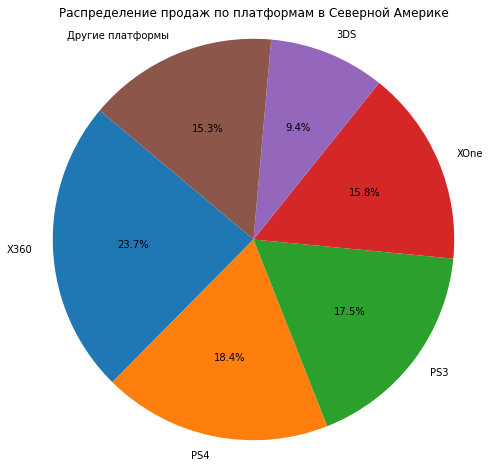

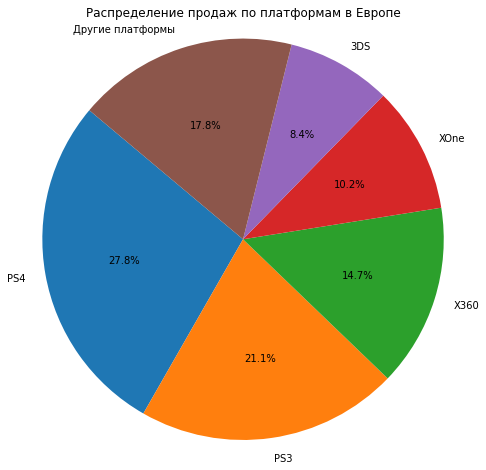

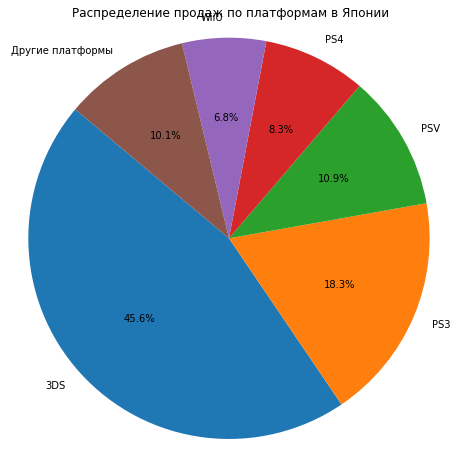

In [47]:
# круговые диаграммы для всех регионов
plot_pie_chart(na_sales, 'Распределение продаж по платформам в Северной Америке')
plot_pie_chart(eu_sales, 'Распределение продаж по платформам в Европе')
plot_pie_chart(jp_sales, 'Распределение продаж по платформам в Японии')

Разница между регионами ощутима. 
Можно отметить сходство Северной Америки и Европы. Топ 5 состоит в этих регионах из платформ X360, PS4, PS3, XOne и 3DS. При этом самой популярной платформой в Северной Америке является X360, а в Европе PS4
Япония по сравнению с другими регионами своеобразна, здесь на первом месте стоит 3DS, а X360 вообще не популярна. PS4 в Японии составляет только 8,3% всех продаж.

**Самые популярные жанры**

In [48]:
# группирую по жанрам и подсчитываю общие продажи по регионам
genre_sales = group_sales(data_filtered, 'genre', sales_cols)

genre_sales

,genre,na_sales,eu_sales,jp_sales
0,Action,177.84,159.34,52.80
1,Adventure,8.92,9.46,8.24
2,Fighting,19.79,10.79,9.44
3,Misc,38.19,26.32,12.86
4,Platform,25.38,21.41,8.63
5,Puzzle,1.13,1.40,2.14
6,Racing,17.22,27.29,2.50
7,Role-Playing,64.00,48.53,65.44
8,Shooter,144.77,113.47,9.23
9,Simulation,7.97,14.55,10.41


In [49]:
# 5 жанров с наибольшими продажами в каждом регионе
genre_na = genre_sales.nlargest(5, 'na_sales')[['genre', 'na_sales']]
genre_eu = genre_sales.nlargest(5, 'eu_sales')[['genre', 'eu_sales']]
genre_jp = genre_sales.nlargest(5, 'jp_sales')[['genre', 'jp_sales']]

display('Топ 5 жанров в Северной Америке:', genre_na.reset_index())
display ('Топ 5 жанров в Европе:', genre_eu.reset_index())
display ('Топ 5 жанров в Японии:', genre_jp.reset_index())

'Топ 5 жанров в Северной Америке:'

,index,genre,na_sales
0,0,Action,177.84
1,8,Shooter,144.77
2,10,Sports,81.53
3,7,Role-Playing,64.00
4,3,Misc,38.19


'Топ 5 жанров в Европе:'

,index,genre,eu_sales
0,0,Action,159.34
1,8,Shooter,113.47
2,10,Sports,69.08
3,7,Role-Playing,48.53
4,6,Racing,27.29


'Топ 5 жанров в Японии:'

,index,genre,jp_sales
0,7,Role-Playing,65.44
1,0,Action,52.80
2,3,Misc,12.86
3,9,Simulation,10.41
4,2,Fighting,9.44


In [50]:
# объединяю оставшиеся жанры в категорию "другие жанры"
other_genre_na = genre_sales[~genre_sales['genre'].isin(genre_na['genre'])]['na_sales'].sum()
other_genre_eu = genre_sales[~genre_sales['genre'].isin(genre_eu['genre'])]['eu_sales'].sum()
other_genre_jp = genre_sales[~genre_sales['genre'].isin(genre_jp['genre'])]['jp_sales'].sum()

# cоздаю новые DataFrame для круговых диаграмм
na_genre_sales = pd.concat([genre_na.set_index('genre')['na_sales'], pd.Series({'Другие жанры': other_genre_na})])
eu_genre_sales = pd.concat([genre_eu.set_index('genre')['eu_sales'], pd.Series({'Другие жанры': other_genre_eu})])
jp_genre_sales = pd.concat([genre_jp.set_index('genre')['jp_sales'], pd.Series({'Другие жанры': other_genre_jp})])


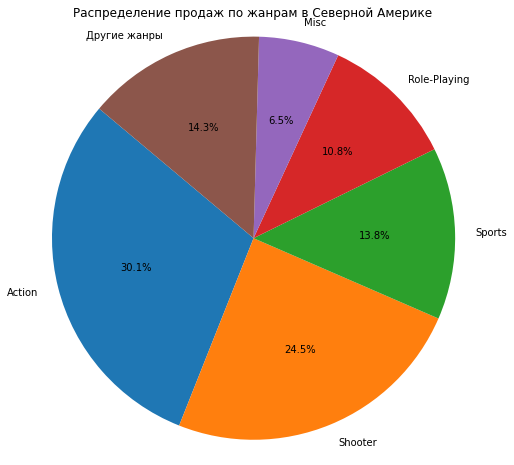

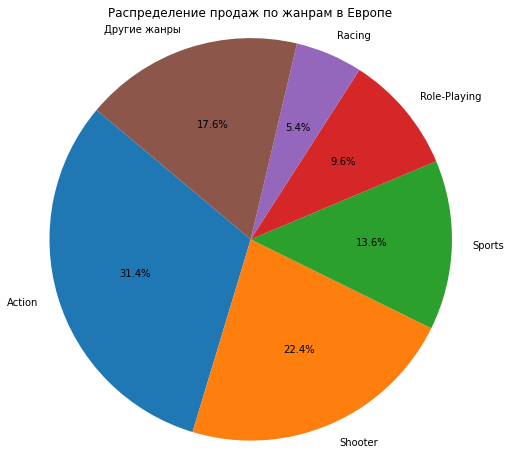

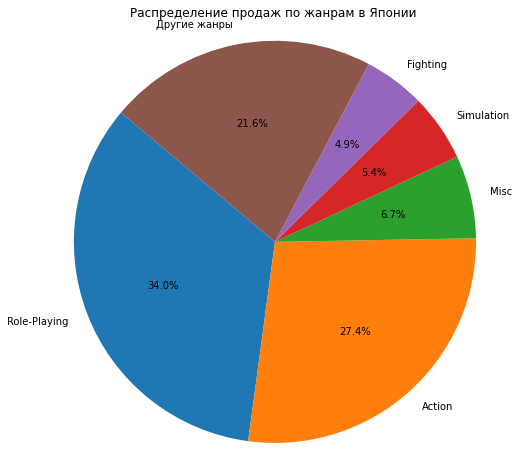

In [51]:
# круговые диаграммы для всех регионов
plot_pie_chart(na_genre_sales, 'Распределение продаж по жанрам в Северной Америке')
plot_pie_chart(eu_genre_sales, 'Распределение продаж по жанрам в Европе')
plot_pie_chart(jp_genre_sales, 'Распределение продаж по жанрам в Японии')

У поьзователей Европы и Северной Америки очень схожие предпочтения по жанрам. Первые четыре позиции по популярности занимаю соответственно экшены, шутеры, спортивные и ролевые игры. В Японии самыми популярными являются ролевые игры и экшены

**Влияет ли рейтинг ESRB на продажи?**

In [52]:
# группирую по рейтингу и подсчитываю общие продажи по регионам
rating_sales = group_sales(data_filtered, 'rating', sales_cols)

rating_sales

,rating,na_sales,eu_sales,jp_sales
0,E,114.37,113.02,28.33
1,E10+,75.70,55.37,8.19
2,M,231.57,193.96,21.20
3,T,66.02,52.96,26.02
4,no_ESRB,103.31,91.50,108.84


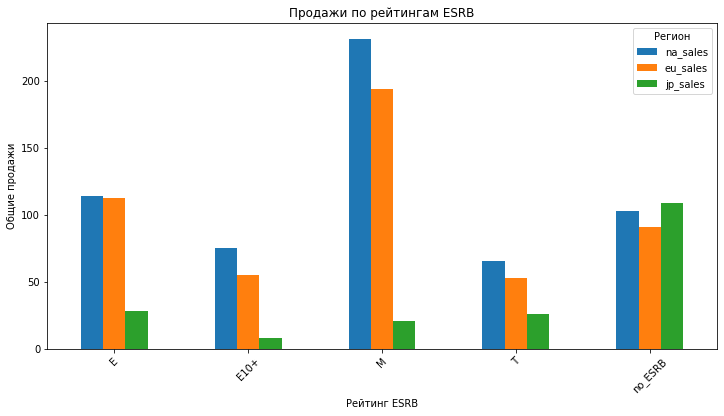

In [53]:
rating_sales.set_index('rating', inplace=True)
rating_sales.plot(kind='bar', figsize=(12, 6))
plt.title("Продажи по рейтингам ESRB")
plt.xlabel("Рейтинг ESRB")
plt.ylabel("Общие продажи")
plt.xticks(rotation=45)
plt.legend(title="Регион")
plt.show()

В Европе и Северной Америки большую часть от покупок занимает категория М, на втором месте E. Японские пользователи предпочитают игры с неопределенным рейтингом.


**Вывод:**

Портрет пользователя в Северной Америке и Европе схож: они предпочитают игровые платформы PS3, PS4 и Xbox 360, а также жанры игр экшен, шутер и спортивные игры. Рейтинг игр, который они выбирают, чаще всего находится в категориях М  и Е.

В отличие от этого, в Японии портрет пользователя выглядит иначе. Здесь игроки выбирают платформу 3DS и отдают предпочтение таким жанрам как ролевые игры и экшен. Рейтинг игр, выбираемых японскими пользователями, чаще всего находится в категории неопределенным рейтингом.

#### Шаг 5. Проверка гипотез

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Проверим гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1: Средние пользовательские рейтинги платформ Xbox One и PC разные

alpha = 0.05

In [54]:
score = data_filtered[data_filtered['user_score'] != -1]

print('Средний пользовательский рейтинг платформ XOne', round(score.query('platform == "XOne"')['user_score'].mean(),2))
print('Средний пользовательский рейтинг платформ PC', round(score.query('platform == "PC"')['user_score'].mean(),2))

xbox_one_scores = score[score['platform'] == 'XOne']['user_score']
pc_scores = score[score['platform'] == 'PC']['user_score']

results = st.ttest_ind(xbox_one_scores, 
                       pc_scores,
                       alternative = 'two-sided')

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Средний пользовательский рейтинг платформ XOne 6.52
Средний пользовательский рейтинг платформ PC 6.43
0.5535080500643661
Не удалось отвергнуть нулевую гипотезу


Нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются

**Средние пользовательские рейтинги жанров Action и Sports разные.**

Проверим гипотезу: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые

H1: Средние пользовательские рейтинги жанров Action и Sports разные

alpha = 0.05

In [55]:
print('Средний пользовательский рейтинг жанра экшен', round(score.query('genre == "Action"')['user_score'].mean(),2))
print('Средний пользовательский рейтинг жанра спортивных игр', round(score.query('genre == "Sports"')['user_score'].mean(),2))

action_scores = score[score['genre'] == 'Action']['user_score']
sports_scores = score[score['genre'] == 'Sports']['user_score']

results = st.ttest_ind(action_scores, 
                       sports_scores,
                       alternative = 'two-sided')

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Средний пользовательский рейтинг жанра экшен 6.83
Средний пользовательский рейтинг жанра спортивных игр 5.46
4.8045233804629176e-26
Отвергаем нулевую гипотезу


Есть основания утверждать, cредние пользовательские рейтинги жанров Action и Sports значимо различаются, при установленном уровне значимости в 5 %

Для проверки наших гипотез и сравнения двух выборок был выбран T-тест. Он предполагает, что данные (рейтинг) следуют нормальному распределению. Для наших выборок (они достаточно большие) мы можем сделать это предположение на основе Центральной предельной теоремы.
Мы проводим двусторонний тест, потому что нас интересует любое отклонение от равенства (как в сторону увеличения, так и в сторону уменьшения).

**Выводы:**
Средние пользовательские рейтинги платформ Xbox One и PC не различаются.
Средние пользовательские рейтинги жанров Action и Sports значимо различаются.


**Общий вывод:**

В ходе исследования исторических данных о продажах игр были выполнены следующие этапы, а также сделаны соответствующие выводы:

**1. Анализ информации о данных**

В данных 16715 строк. Есть пропущенные значения и некорректный тип данных. Явные дубликаты отсутствуют.

**2. Предобработка данных**

В ходе предобработки данных в датафрейме сделаны следующие преобразования:
1. Названия столбцов приведены к нижнему регистру
2. Удалены неявные дубликаты
3. В столбцах user_score и critic_score пропуски заменены на - 1, столбце rating пропуски заменены на no_ESRB
4. Типы данных в столбцах year_of_release и critic_score заменены на целые значения
5. Добавлен столбец total_sales, отражающий суммарные продажи во всех регионах

**3. Исследовательский анализ данных**

1. Количество выпускаемых игр росло с 1991 по 2008-2009 годы, потом оно начало уменьшаться.
2. Более половины всех продаж (62,9%) приходится на 6 платформ: PS2, X360, PS3, Wii, DS, PS.
3. "Срок жизни" платформы в среднем составляет 7 лет. Но пика по продажам в основном достигают через пять лет после начала продаж.
4. Среди всех платформ за последние 5 лет положительную динамику демонстрируют PS4 и XOne. Можно назвать их потенциально прибыльными.
5. Оценки зрителей не влияют на продажи, а оценки критиков влияют на продажи положительно.
6. Самыми прибыльными жанрами являются шутеры и экшены. Стоит обратить внимание на платформеры и спортивные игры, которые также показывают неплохие результаты по продажам

**4. Составление портрета пользователя для каждого региона:**

Портрет пользователя в Северной Америке и Европе схож: они предпочитают игровые платформы PS3, PS4 и Xbox 360, а также жанры игр экшен, шутер и спортивные игры. Рейтинг игр, который они выбирают, чаще всего находится в категориях М и Е.

В отличие от этого, в Японии портрет пользователя выглядит иначе. Здесь игроки выбирают платформу 3DS и отдают предпочтение таким жанрам как ролевые игры и экшен. Рейтинг игр, выбираемых японскими пользователями, чаще всего находится в категории неопределенным рейтингом.

**5. Проверка гипотез**

Средние пользовательские рейтинги платформ Xbox One и PC не различаются.
Средние пользовательские рейтинги жанров Action и Sports значимо различаются.

**Заключение**

Потенциально успешный продукт и рекламные кампании должны быть ориентированы на платформы PS3, PS4, Xbox One, Xbox 360, 3DS (для Японии). Для западного рынка рекомендуется фокусироваться на играх жанра Action, Shooter и Sports, в то время как для Японии предпочтительными являются игры жанров Role-Playing и Action. При этом стоит учитывать категории М и Е, но не ограничиваться только ими.